# Project: Classify House Prices
- Put houses in price groups and try to predict based on Latitude and Longitude
- That will show if the area is a good indicator of the house unit price

### Step 1: Import libraries

In [18]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import r2_score, accuracy_score
import matplotlib.pyplot as plt
%matplotlib inline

### Step 2: Read the data
- Use Pandas [read_csv](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html) method to read **files/house_prices.csv**

In [3]:
data = pd.read_csv('files/house_prices.csv')
data.head()

,Transaction,House age,Distance to MRT station,Number of convenience stores,Latitude,Longitude,House unit price
0,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


,Transaction,House age,Distance to MRT station,Number of convenience stores,Latitude,Longitude,House unit price,Class,Class id
0,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9,"(36.907, 44.233]",4
1,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2,"(36.907, 44.233]",4
2,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3,"(44.233, 51.56]",5
3,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8,"(51.56, 58.887]",6
4,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1,"(36.907, 44.233]",4


### Step 3: Prepare data
- Create 15 bins of house prices
    - HINT: use [cut](https://pandas.pydata.org/docs/reference/api/pandas.cut.html) on the **'House unit price'** column with **bins=15** and assign the result to column **Class**.
    - Get the category codes by transforming column **Class** with **.cat.codes** and assign it to **Class id**

In [9]:
data['Class'] = pd.cut(data['House unit price'], bins=15)
data['Class id'] = data['Class'].cat.codes
data.head()

,Transaction,House age,Distance to MRT station,Number of convenience stores,Latitude,Longitude,House unit price,Class,Class id
0,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9,"(36.907, 44.233]",4
1,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2,"(36.907, 44.233]",4
2,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3,"(44.233, 51.56]",5
3,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8,"(51.56, 58.887]",6
4,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1,"(36.907, 44.233]",4


### Step 4: Prepare training and test data
- Assign **X** be all the data (it is needed in final step)
- Assign **y** to be the **Class id** column.
- Use **train_test_split** with **test_size=0.15**

In [10]:
X = data
y = data['Class id']

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.15, random_state=42)

### Step 5: Train a $k$-Neighbours Classifier
- Create a model to **KNeighborsClassifier()**
- Fit the model on **X_train[['Latitude', 'Longitude']]** and **y_train**
- Predict **X_test[['Latitude', 'Longitude']]** and assign it to **y_pred**
- Calculate the accuracy score

In [14]:
model = KNeighborsClassifier()
model.fit(X_train[['Latitude', 'Longitude']], y_train)
y_pred = model.predict(X_test[['Latitude', 'Longitude']])
accuracy_score(y_test, y_pred)

0.42857142857142855

### Step 6: Make prediction of categories
- Convert **y_pred** to a DataFrame
    - HINT: **df_pred = pd.DataFrame(y_pred, columns=['Pred cat'])**
- Get the middle value of the prediction category.
    - HINT: **df_pred['Pred'] = df_pred['Pred cat'].apply(lambda x: X_test['Class'].cat.categories[x].mid)**
- Calculate the **r2_score** of the predicted and real price **'House unit price'** of **X_test**

In [15]:
df_pred = pd.DataFrame(y_pred, columns=['Pred cat'])
df_pred['Pred'] = df_pred['Pred cat'].apply(lambda x: X_test['Class'].cat.categories[x].mid)

In [16]:
r2_score(X_test['House unit price'], df_pred['Pred'])

0.6935774017709413

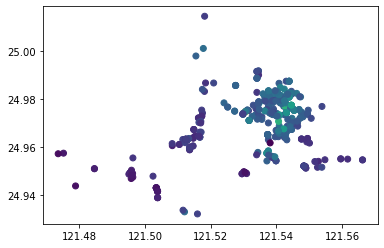

In [19]:
fig, ax = plt.subplots()

ax.scatter(x=X['Longitude'], y=X['Latitude'], c=data['House unit price'])